# ESTUDO DE DISTRIBUIÇÃO E COMPORTAMENTO DOS DADOS


Importanto Bibliotecas

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Leitura dos Dados

In [334]:
# DADOS DE 24/03/2010 ATÉ 24/03/2025
bolsa = pd.read_csv('Dados_Historicos_Ibovespa.csv', sep=',')

Tratamento nas Variáveis

In [335]:
bolsa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.03.2025,131.321,132.344,132.424,130.992,"8,30B","-0,77%"
1,21.03.2025,132.345,132.005,132.588,131.776,"14,19B","0,30%"
2,20.03.2025,131.955,132.505,132.713,131.813,"14,19B","-0,42%"
3,19.03.2025,132.508,131.476,132.984,131.451,"12,20B","0,79%"
4,18.03.2025,131.475,130.832,131.834,130.722,"10,99B","0,49%"


In [336]:
bolsa.shape

(3719, 7)

In [337]:
# VERIFICA NULOS
bolsa.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [338]:
# RENOMEIA OS DADOS
bolsa.rename(columns={
    'Data': 'DATA',
    'Último': 'ULTIMO',
    'Abertura': 'ABERTURA',
    'Máxima': 'MAXIMA',
    'Mínima': 'MINIMA',
    'Vol.': 'VOLUME',
    'Var%': 'VARIACAO'
}, inplace=True)

In [339]:
bolsa['VOLUME'] = bolsa['VOLUME'].str.replace(',', '.', regex=False)

In [340]:
bolsa['VARIACAO'] = bolsa['VARIACAO'].str.replace(',', '.', regex=False)

In [341]:
bolsa['VOLUME_LETRA'] = bolsa['VOLUME'].str.extract(r'([B|M|K])$')

In [342]:
bolsa['VARIACAO'] = bolsa['VARIACAO'].str.replace('%', '', regex=False).astype(float)

In [343]:
bolsa['VOLUME'] = bolsa['VOLUME'].str.replace(r'[B|M|K]', '', regex=True)

In [344]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA
0,24.03.2025,131.321,132.344,132.424,130.992,8.30,-0.77,B
1,21.03.2025,132.345,132.005,132.588,131.776,14.19,0.30,B
2,20.03.2025,131.955,132.505,132.713,131.813,14.19,-0.42,B
3,19.03.2025,132.508,131.476,132.984,131.451,12.20,0.79,B
4,18.03.2025,131.475,130.832,131.834,130.722,10.99,0.49,B


In [345]:
bolsa['VOLUME'] = bolsa['VOLUME'].astype(float)

In [346]:
bolsa['VARIACAO'] = bolsa['VARIACAO'].astype(float)

In [347]:
bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATA          3719 non-null   object 
 1   ULTIMO        3719 non-null   float64
 2   ABERTURA      3719 non-null   float64
 3   MAXIMA        3719 non-null   float64
 4   MINIMA        3719 non-null   float64
 5   VOLUME        3718 non-null   float64
 6   VARIACAO      3719 non-null   float64
 7   VOLUME_LETRA  3718 non-null   object 
dtypes: float64(6), object(2)
memory usage: 232.6+ KB


In [348]:
bolsa['VOLUME'] = bolsa['VOLUME'].fillna((bolsa['VOLUME'].shift(1) + bolsa['VOLUME'].shift(-1)) / 2)

In [349]:
bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATA          3719 non-null   object 
 1   ULTIMO        3719 non-null   float64
 2   ABERTURA      3719 non-null   float64
 3   MAXIMA        3719 non-null   float64
 4   MINIMA        3719 non-null   float64
 5   VOLUME        3719 non-null   float64
 6   VARIACAO      3719 non-null   float64
 7   VOLUME_LETRA  3718 non-null   object 
dtypes: float64(6), object(2)
memory usage: 232.6+ KB


In [350]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA
0,24.03.2025,131.321,132.344,132.424,130.992,8.30,-0.77,B
1,21.03.2025,132.345,132.005,132.588,131.776,14.19,0.30,B
2,20.03.2025,131.955,132.505,132.713,131.813,14.19,-0.42,B
3,19.03.2025,132.508,131.476,132.984,131.451,12.20,0.79,B
4,18.03.2025,131.475,130.832,131.834,130.722,10.99,0.49,B


In [351]:
bolsa['DATA'] = pd.to_datetime(bolsa['DATA'])

<ipython-input-351-c0404e0ffd1a>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bolsa['DATA'] = pd.to_datetime(bolsa['DATA'])


In [352]:
bolsa = bolsa.sort_values(by='DATA')

In [353]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA
3718,2010-03-24,68.913,69.382,69.677,68.744,1.60,-0.68,M
3717,2010-03-25,68.442,68.916,69.572,68.377,1.48,-0.68,M
3716,2010-03-26,68.683,68.442,68.910,68.024,1.77,0.35,M
3715,2010-03-29,69.939,68.681,69.943,68.681,1.53,1.83,M
3714,2010-03-30,69.960,69.942,70.451,69.750,1.49,0.03,M


In [354]:
bolsa.reset_index(drop=True, inplace=True)

In [355]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA
0,2010-03-24,68.913,69.382,69.677,68.744,1.60,-0.68,M
1,2010-03-25,68.442,68.916,69.572,68.377,1.48,-0.68,M
2,2010-03-26,68.683,68.442,68.910,68.024,1.77,0.35,M
3,2010-03-29,69.939,68.681,69.943,68.681,1.53,1.83,M
4,2010-03-30,69.960,69.942,70.451,69.750,1.49,0.03,M


In [356]:
bolsa['VOLUME_LETRA'] = bolsa['VOLUME_LETRA'].ffill()

In [357]:
bolsa.isnull().sum()

,0
DATA,0
ULTIMO,0
ABERTURA,0
MAXIMA,0
MINIMA,0
VOLUME,0
VARIACAO,0
VOLUME_LETRA,0


In [358]:
bolsa.round(2)

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA
0,2010-03-24,68.91,69.38,69.68,68.74,1.60,-0.68,M
1,2010-03-25,68.44,68.92,69.57,68.38,1.48,-0.68,M
2,2010-03-26,68.68,68.44,68.91,68.02,1.77,0.35,M
3,2010-03-29,69.94,68.68,69.94,68.68,1.53,1.83,M
4,2010-03-30,69.96,69.94,70.45,69.75,1.49,0.03,M
...,...,...,...,...,...,...,...,...
3714,2025-03-18,131.48,130.83,131.83,130.72,10.99,0.49,B
3715,2025-03-19,132.51,131.48,132.98,131.45,12.20,0.79,B
3716,2025-03-20,131.96,132.50,132.71,131.81,14.19,-0.42,B
3717,2025-03-21,132.34,132.00,132.59,131.78,14.19,0.30,B


Identificando a Variável Target

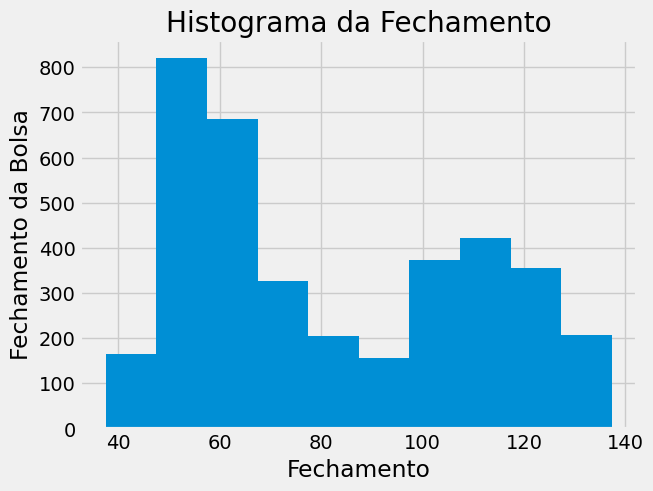

In [359]:
plt.hist(bolsa['ULTIMO'], bins=10)
plt.ylabel('Fechamento da Bolsa')
plt.xlabel('Fechamento')
plt.title('Histograma da Fechamento')
plt.show()

In [360]:
bolsa["RAIZ_VALOR"] = np.sqrt(bolsa["ULTIMO"])
bolsa.round(2)

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA,RAIZ_VALOR
0,2010-03-24,68.91,69.38,69.68,68.74,1.60,-0.68,M,8.30
1,2010-03-25,68.44,68.92,69.57,68.38,1.48,-0.68,M,8.27
2,2010-03-26,68.68,68.44,68.91,68.02,1.77,0.35,M,8.29
3,2010-03-29,69.94,68.68,69.94,68.68,1.53,1.83,M,8.36
4,2010-03-30,69.96,69.94,70.45,69.75,1.49,0.03,M,8.36
...,...,...,...,...,...,...,...,...,...
3714,2025-03-18,131.48,130.83,131.83,130.72,10.99,0.49,B,11.47
3715,2025-03-19,132.51,131.48,132.98,131.45,12.20,0.79,B,11.51
3716,2025-03-20,131.96,132.50,132.71,131.81,14.19,-0.42,B,11.49
3717,2025-03-21,132.34,132.00,132.59,131.78,14.19,0.30,B,11.50


In [361]:
bolsa.round(2)

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VOLUME,VARIACAO,VOLUME_LETRA,RAIZ_VALOR
0,2010-03-24,68.91,69.38,69.68,68.74,1.60,-0.68,M,8.30
1,2010-03-25,68.44,68.92,69.57,68.38,1.48,-0.68,M,8.27
2,2010-03-26,68.68,68.44,68.91,68.02,1.77,0.35,M,8.29
3,2010-03-29,69.94,68.68,69.94,68.68,1.53,1.83,M,8.36
4,2010-03-30,69.96,69.94,70.45,69.75,1.49,0.03,M,8.36
...,...,...,...,...,...,...,...,...,...
3714,2025-03-18,131.48,130.83,131.83,130.72,10.99,0.49,B,11.47
3715,2025-03-19,132.51,131.48,132.98,131.45,12.20,0.79,B,11.51
3716,2025-03-20,131.96,132.50,132.71,131.81,14.19,-0.42,B,11.49
3717,2025-03-21,132.34,132.00,132.59,131.78,14.19,0.30,B,11.50


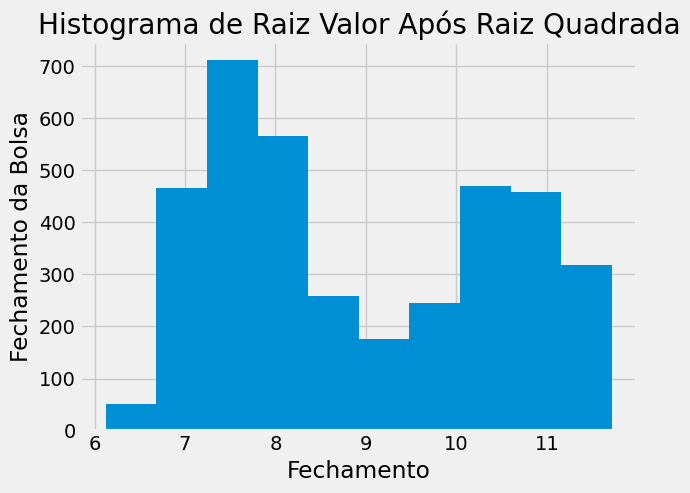

In [362]:
plt.hist(bolsa['RAIZ_VALOR'], bins=10)
plt.ylabel('Fechamento da Bolsa')
plt.xlabel('Fechamento')
plt.title('Histograma de Raiz Valor Após Raiz Quadrada')
plt.show()

Box Plot

Text(0, 0.5, 'Valor do fechamento da bolsa')

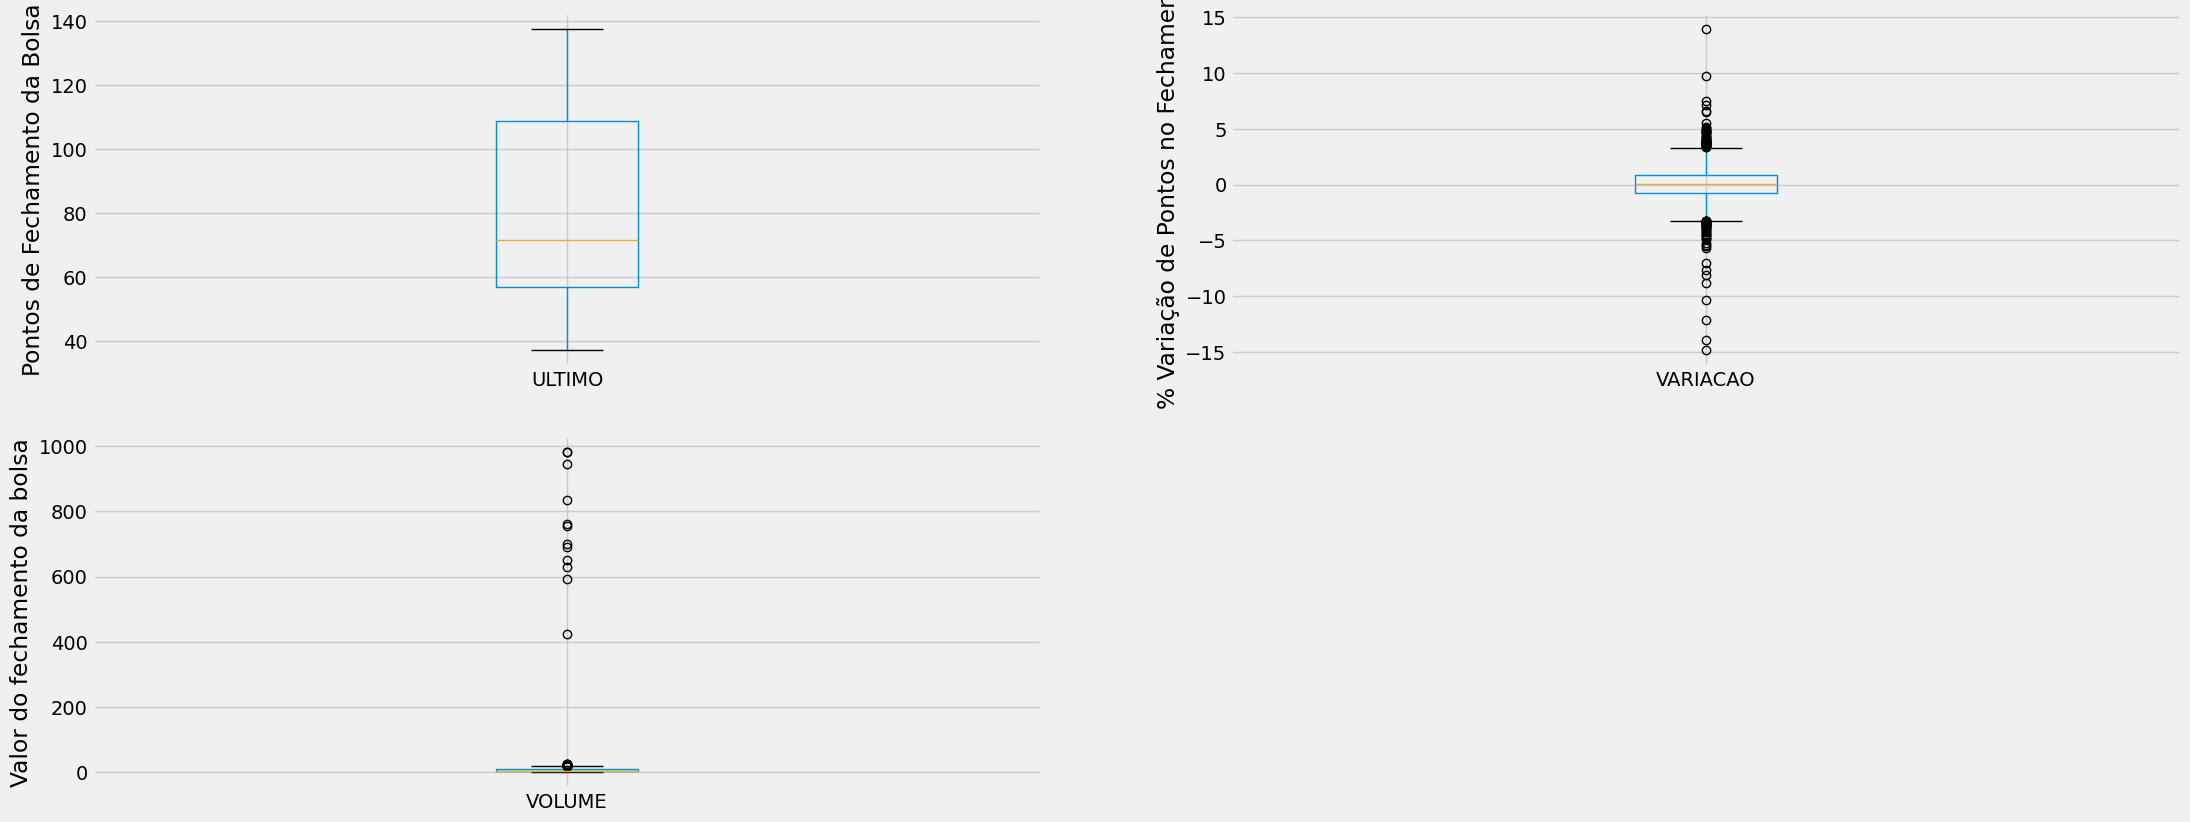

In [363]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = bolsa.boxplot(column=["ULTIMO"])
fig.set_title('')
fig.set_ylabel('Pontos de Fechamento da Bolsa')

plt.subplot(4, 2, 2)
fig = bolsa.boxplot(column=["VARIACAO"])
fig.set_title('')
fig.set_ylabel('% Variação de Pontos no Fechamento')


plt.subplot(4, 2, 3)
fig = bolsa.boxplot(column=["VOLUME"])
fig.set_title('')
fig.set_ylabel('Valor do fechamento da bolsa')


In [364]:
def converter_valor(row):
    if row['VOLUME_LETRA'] == 'B':
        return row['VOLUME'] * 1_000_000_000
    elif row['VOLUME_LETRA'] == 'M':
        return row['VOLUME'] * 1_000_000
    elif row['VOLUME_LETRA'] == 'K':
        return row['VOLUME'] * 1_000
    else:
        return row['VOLUME']

In [365]:
bolsa['VALOR_CONVERTIDO'] = bolsa.apply(converter_valor, axis=1)

In [366]:
bolsa.drop(columns=['VOLUME', 'VOLUME_LETRA'], inplace=True)

In [367]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VARIACAO,RAIZ_VALOR,VALOR_CONVERTIDO
0,2010-03-24,68.913,69.382,69.677,68.744,-0.68,8.301385,1600000.0
1,2010-03-25,68.442,68.916,69.572,68.377,-0.68,8.272968,1480000.0
2,2010-03-26,68.683,68.442,68.910,68.024,0.35,8.287521,1770000.0
3,2010-03-29,69.939,68.681,69.943,68.681,1.83,8.362954,1530000.0
4,2010-03-30,69.960,69.942,70.451,69.750,0.03,8.364209,1490000.0


In [368]:
bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA              3719 non-null   datetime64[ns]
 1   ULTIMO            3719 non-null   float64       
 2   ABERTURA          3719 non-null   float64       
 3   MAXIMA            3719 non-null   float64       
 4   MINIMA            3719 non-null   float64       
 5   VARIACAO          3719 non-null   float64       
 6   RAIZ_VALOR        3719 non-null   float64       
 7   VALOR_CONVERTIDO  3719 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 232.6 KB


Matriz de Correlação

In [369]:
bolsa['ANO'] = bolsa['DATA'].dt.year
bolsa['MES'] = bolsa['DATA'].dt.month
bolsa['DIA'] = bolsa['DATA'].dt.day


X = bolsa[['ANO', 'MES', 'DIA']]
y = bolsa['ULTIMO']


In [370]:
bolsa['DATA_ADJ'] = bolsa['ANO'].astype(str) + bolsa['MES'].astype(str) + bolsa['DIA'].astype(str)

In [371]:
bolsa.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VARIACAO,RAIZ_VALOR,VALOR_CONVERTIDO,ANO,MES,DIA,DATA_ADJ
0,2010-03-24,68.913,69.382,69.677,68.744,-0.68,8.301385,1600000.0,2010,3,24,2010324
1,2010-03-25,68.442,68.916,69.572,68.377,-0.68,8.272968,1480000.0,2010,3,25,2010325
2,2010-03-26,68.683,68.442,68.910,68.024,0.35,8.287521,1770000.0,2010,3,26,2010326
3,2010-03-29,69.939,68.681,69.943,68.681,1.83,8.362954,1530000.0,2010,3,29,2010329
4,2010-03-30,69.960,69.942,70.451,69.750,0.03,8.364209,1490000.0,2010,3,30,2010330


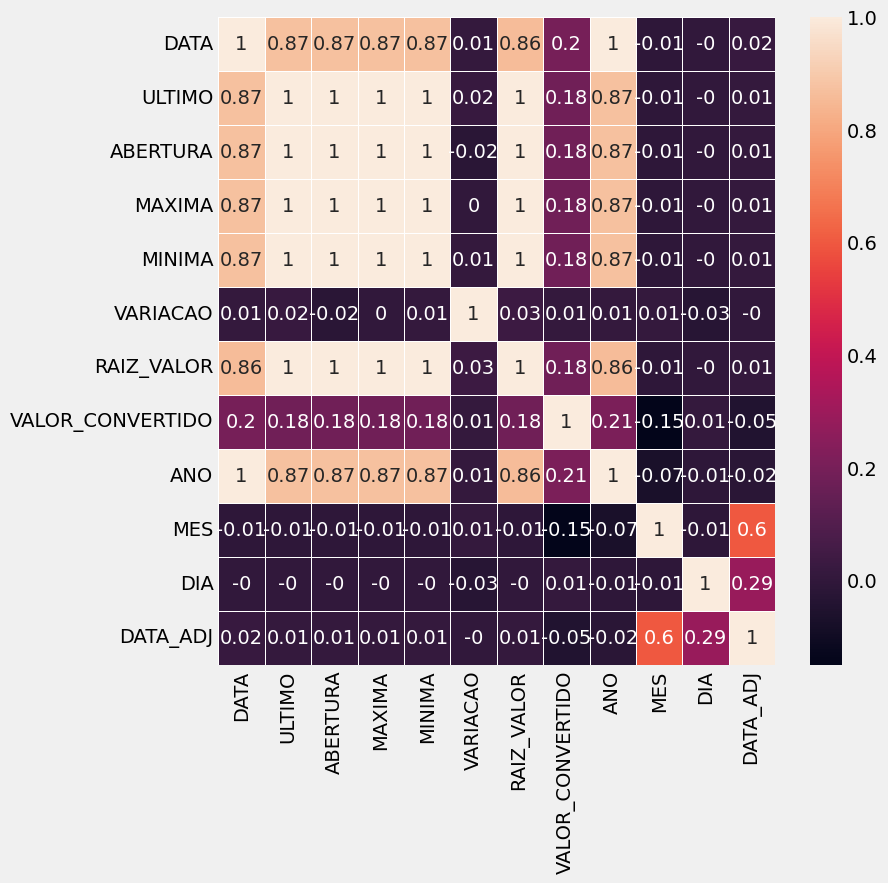

In [372]:
correlation_matrix = bolsa.corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(data = correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

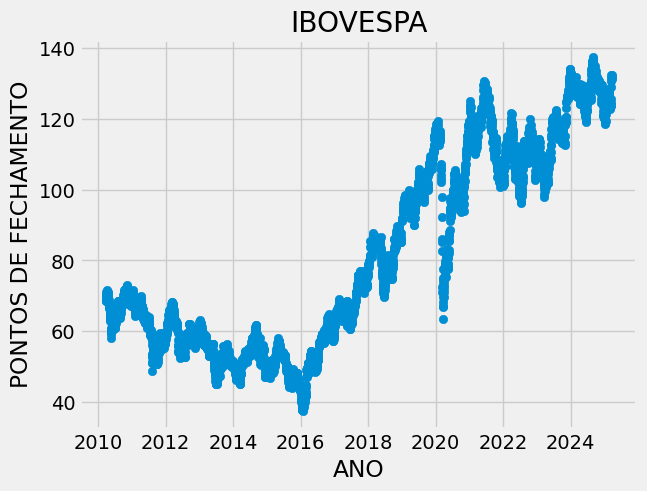

In [532]:
plt.scatter("DATA", "ULTIMO", data=bolsa)
plt.xlabel("ANO")
plt.ylabel("PONTOS DE FECHAMENTO")
plt.title("IBOVESPA")
plt.show()

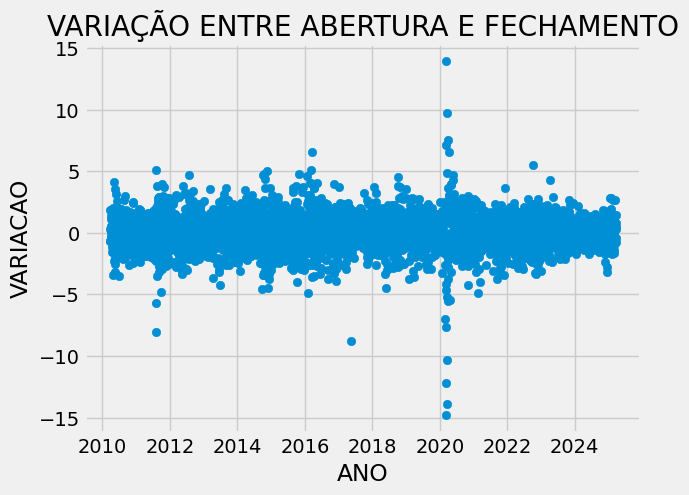

In [533]:
plt.scatter("DATA", "VARIACAO", data=bolsa)
plt.xlabel("ANO")
plt.ylabel("VARIACAO")
plt.title("VARIAÇÃO ENTRE ABERTURA E FECHAMENTO")
plt.show()

<ipython-input-375-bec87a3a470b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="DATA", y="ULTIMO", data=bolsa, palette="hls")


<Axes: xlabel='DATA', ylabel='ULTIMO'>

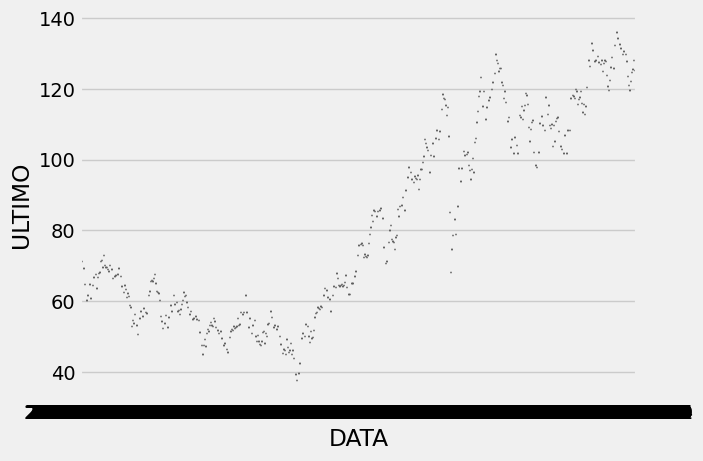

In [375]:
sb.boxplot(x="DATA", y="ULTIMO", data=bolsa, palette="hls")

MODELO DE PREDIÇÃO

In [376]:
from sklearn.linear_model import LinearRegression

In [377]:
lr = LinearRegression()

In [378]:
x = bolsa[['ANO', 'MES', 'DIA']]
y = bolsa['ULTIMO']

In [267]:
# x = bolsa[['DATA']]
# y = bolsa['ULTIMO']

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [381]:
lr.fit(X_train, y_train)

LinearRegression()

In [382]:
y_pred = lr.predict(X_test)

In [383]:
print('Intercepto:' , lr.intercept_)
print('Coeficientes:' , lr.coef_)

Intercepto: -11270.114773109182
Coeficientes: [5.62585969 0.44528667 0.02081685]


In [384]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,ANO,5.625860
1,MES,0.445287
2,DIA,0.020817


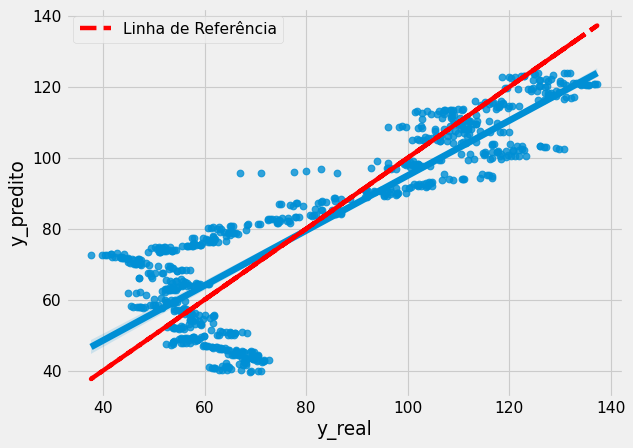

In [385]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y_real', ylabel='y_predito')
plt.plot(y_test, y_test, '--r', label='Linha de Referência')
plt.legend()
plt.show()

In [386]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [387]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print('R2:', R2)

MAE: 11.476852318032615
MSE: 198.83244221746392
RMSE: 14.100795800856911
R2: 0.7438157897142776


In [388]:
bolsa.to_csv('bolsa_acoes.csv', index=False)

# NEURAL *LONG TERM*   LSTM


In [389]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [390]:
bolsa_neural = pd.read_csv('bolsa_acoes.csv', sep=',')
bolsa_neural.head()

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,VARIACAO,RAIZ_VALOR,VALOR_CONVERTIDO,ANO,MES,DIA,DATA_ADJ
0,2010-03-24,68.913,69.382,69.677,68.744,-0.68,8.301385,1600000.0,2010,3,24,2010324
1,2010-03-25,68.442,68.916,69.572,68.377,-0.68,8.272968,1480000.0,2010,3,25,2010325
2,2010-03-26,68.683,68.442,68.910,68.024,0.35,8.287521,1770000.0,2010,3,26,2010326
3,2010-03-29,69.939,68.681,69.943,68.681,1.83,8.362954,1530000.0,2010,3,29,2010329
4,2010-03-30,69.960,69.942,70.451,69.750,0.03,8.364209,1490000.0,2010,3,30,2010330


In [391]:
bolsa_neural['DATA'] = pd.to_datetime(bolsa_neural['DATA'])

# Definindo a coluna 'DATA' como índice
bolsa_neural.set_index('DATA', inplace=True)

In [392]:
bolsa_neural.head()

,ULTIMO,ABERTURA,MAXIMA,MINIMA,VARIACAO,RAIZ_VALOR,VALOR_CONVERTIDO,ANO,MES,DIA,DATA_ADJ
DATA,,,,,,,,,,,
2010-03-24,68.913,69.382,69.677,68.744,-0.68,8.301385,1600000.0,2010,3,24,2010324
2010-03-25,68.442,68.916,69.572,68.377,-0.68,8.272968,1480000.0,2010,3,25,2010325
2010-03-26,68.683,68.442,68.910,68.024,0.35,8.287521,1770000.0,2010,3,26,2010326
2010-03-29,69.939,68.681,69.943,68.681,1.83,8.362954,1530000.0,2010,3,29,2010329
2010-03-30,69.960,69.942,70.451,69.750,0.03,8.364209,1490000.0,2010,3,30,2010330


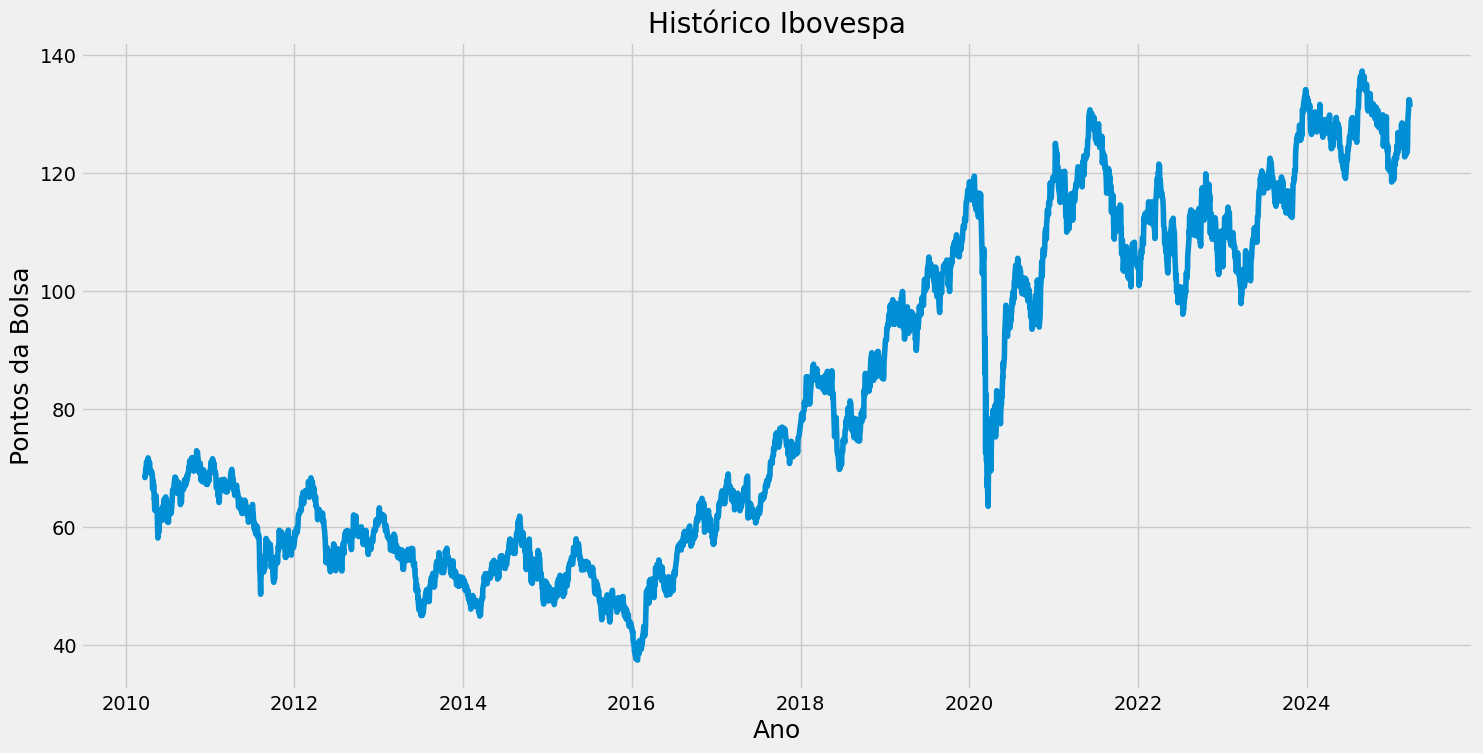

In [393]:
plt.figure(figsize=(16,8))
plt.title('Histórico Ibovespa')
plt.plot(bolsa_neural['ULTIMO'])
plt.xlabel('Ano', fontsize=18)
plt.ylabel('Pontos da Bolsa', fontsize=18)
plt.show()

In [394]:
bolsa_fechamento = bolsa_neural.filter(['ULTIMO'])
dataset = bolsa_fechamento.values

In [395]:
training_data_len = math.ceil(len(dataset) * .8)

In [396]:
training_data_len

2976

In [397]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.3146414 ],
       [0.30992418],
       [0.31233788],
       ...,
       [0.94602742],
       [0.9499334 ],
       [0.93967771]])

In [398]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.3146414 , 0.30992418, 0.31233788, 0.32491712, 0.32512744,
       0.32925376, 0.33690547, 0.33844783, 0.33650485, 0.33347021,
       0.34340541, 0.33971977, 0.33167747, 0.33346019, 0.33589392,
       0.33077609, 0.31972919, 0.31649424, 0.31869761, 0.31937865,
       0.32061053, 0.31423077, 0.29058459, 0.29203682, 0.30527707,
       0.30079021, 0.29667391, 0.27413943, 0.27459012, 0.25956714,
       0.25412882, 0.27998838, 0.26969263, 0.27769487, 0.27332819,
       0.25954711, 0.25407874, 0.23379771, 0.22226006, 0.20726712,
       0.22796879, 0.22452352, 0.21720232, 0.22727773, 0.24632688,
       0.24487466, 0.25589151, 0.24381303, 0.25484992, 0.24216051,
       0.23722295, 0.24334231, 0.24018749, 0.25591154, 0.26148006,
       0.26075896, 0.26986289, 0.27295763, 0.27085441, 0.26982283])]
[np.float64(0.27373882039520464)]

[array([0.3146414 , 0.30992418, 0.31233788, 0.32491712, 0.32512744,
       0.32925376, 0.33690547, 0.33844783, 0.33650485, 0.33347021,
       0.34340541, 0.33

In [399]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [400]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2916, 60, 1)

In [401]:
#LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [402]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [403]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2916/2916 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - loss: 0.0040


In [404]:
#TESTING DATASET
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [405]:
# NUMPY ARRAY
x_test = np.array(x_test)

In [406]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [407]:
#Predicted  # Uniformizar os valores
previsao = model.predict(x_test)
previsao = scaler.inverse_transform(previsao)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [408]:
#RMSE
rmse = np.sqrt(np.mean(previsao - y_test)**2)
rmse

np.float64(0.515673263282827)

<ipython-input-409-0bc5ae432c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['previsao'] = previsao


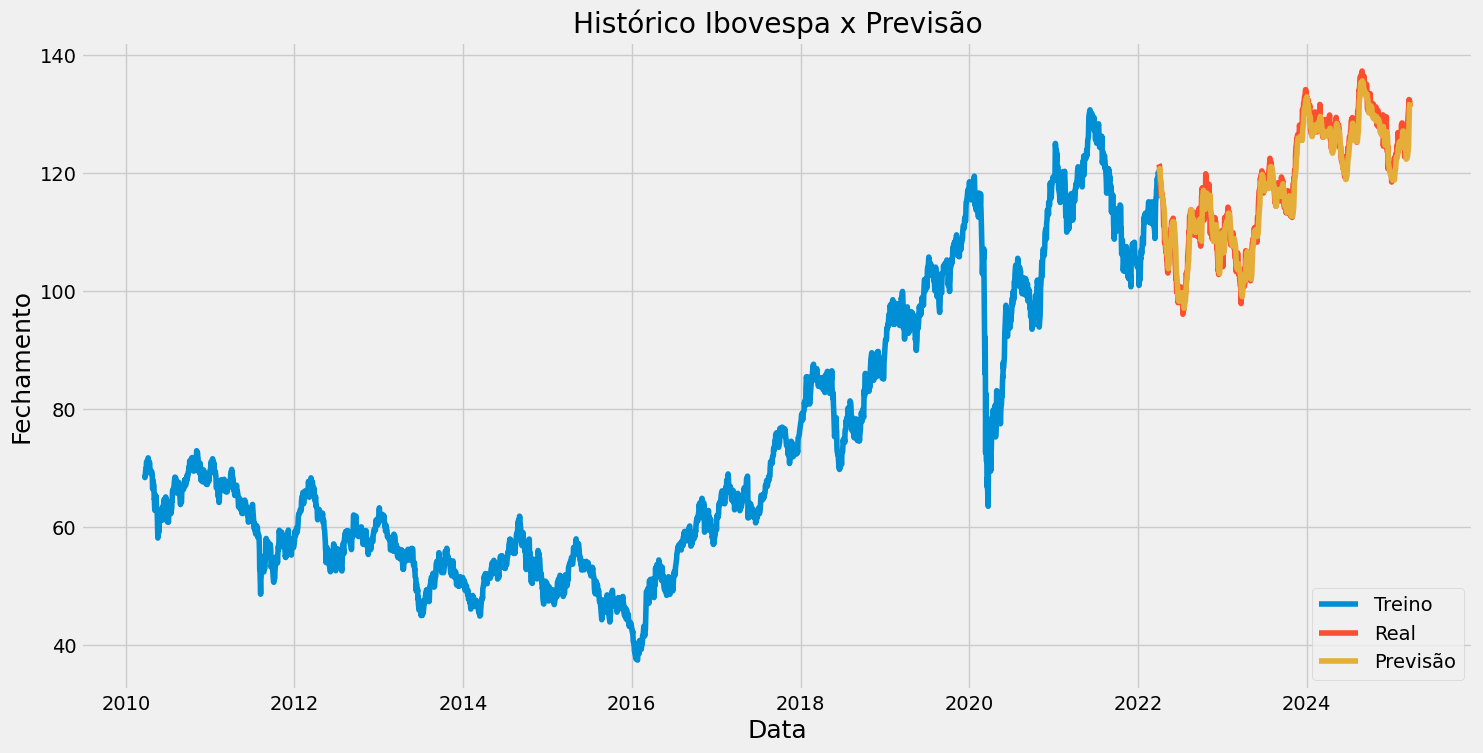

In [409]:
#Plot
train = bolsa_fechamento[:training_data_len]
validacao = bolsa_fechamento[training_data_len:]
validacao['previsao'] = previsao

plt.figure(figsize=(16,8))
plt.title('Histórico Ibovespa x Previsão')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Fechamento', fontsize=18)
plt.plot(train['ULTIMO'])
plt.plot(validacao[['ULTIMO', 'previsao']])
plt.legend(['Treino', 'Real', 'Previsão'], loc='lower right')
plt.show()

In [410]:
#Validos e Previsão
validacao

,ULTIMO,previsao
DATA,,
2022-04-01,121.570,120.165405
2022-04-04,121.280,120.530815
2022-04-05,118.885,120.801010
2022-04-06,118.228,120.428635
2022-04-07,118.862,119.688263
...,...,...
2025-03-18,131.475,126.568588
2025-03-19,132.508,128.415222
2025-03-20,131.955,130.135300


In [524]:
#Prediçao Futura
validacao.rename(columns={'previsao': 'PREVISAO'}, inplace=True)
validacao.filter(['PREVISAO'])
past_60_days = validacao.filter(['PREVISAO']).tail(60)
past_60_days['PREVISAO'] = past_60_days['PREVISAO'].astype('float64')
#past_60_days['PERIODO'] = past_60_days.index
#past_60_days.sort_values(by='PERIODO', ascending=True)
past_60_days.tail(5).round(2)

<ipython-input-524-53f0ed83cc28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.rename(columns={'previsao': 'PREVISAO'}, inplace=True)


,PREVISAO
DATA,
2025-03-18,126.57
2025-03-19,128.42
2025-03-20,130.14
2025-03-21,131.30
2025-03-24,132.05


In [420]:
# past_60_days.info()

In [421]:

past_60_days_upper = scaler.transform(past_60_days)

X_test = []
X_test.append(past_60_days_upper)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
#print('A previsão para de fechamento da Ibovespa para o próximo dia 14/03/2025 é de', prediction, 'pontos')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [422]:
print('A previsão para de fechamento da Ibovespa para o próximo dia 25/03/2025 é de', prediction, 'pontos')

A previsão para de fechamento da Ibovespa para o próximo dia 25/03/2025 é de [[130.0515]] pontos


In [423]:
#RAIZ DO ERRO QUADRATICO MÉDIO
print(f'RMSE {rmse.round(2)}')


RMSE 0.52


In [424]:
#ACURACIA
media = bolsa_fechamento['ULTIMO'].mean()
acuracia = (1- rmse/media)
print(f'ACURACIA DE {acuracia * 100:.2f}%')

ACURACIA DE 99.37%


# PROPHET

In [428]:
import pandas as pd
from prophet import Prophet

In [444]:
bolsa_prophet = pd.read_csv('bolsa_acoes.csv', sep=',')
bolsa_prophet['DATA'] = pd.to_datetime(bolsa_prophet['DATA'])
bolsa_prophet.rename(columns={'DATA': 'ds', 'ULTIMO': 'y'}, inplace=True)
#bolsa_prophet.head()
#print(bolsa_prophet)

In [445]:
m = Prophet()
m.fit(bolsa_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2l2p2jt/15n01pup.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2l2p2jt/er5ycroh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10127', 'data', 'file=/tmp/tmpc2l2p2jt/15n01pup.json', 'init=/tmp/tmpc2l2p2jt/er5ycroh.json', 'output', 'file=/tmp/tmpc2l2p2jt/prophet_modelfyc02vfq/prophet_model-20250325003248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [529]:
forecast = m.predict(future)
prophet_previsao = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
previsao_7_dias = prophet_previsao[['ds', 'yhat']].rename(columns={'ds': 'DATA', 'yhat': 'PREVISAO'})
previsao_7_dias.tail(10)
#print(prophet_previsao)
#print(forecast)

,DATA,PREVISAO
3716,2025-03-20,130.112477
3717,2025-03-21,130.166959
3718,2025-03-24,130.303886
3719,2025-03-25,130.399660
3720,2025-03-26,130.499733
3721,2025-03-27,130.560128
3722,2025-03-28,130.677077
3723,2025-03-29,129.971432
3724,2025-03-30,130.071359
3725,2025-03-31,130.945304


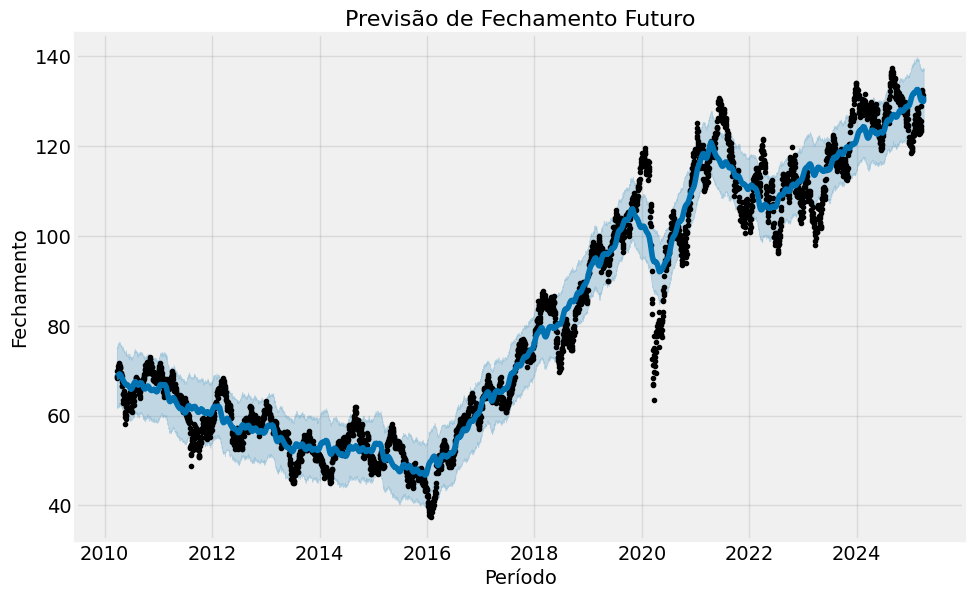

In [484]:
grafico_prophet = m.plot(prophet_previsao)


plt.xlabel('Período', fontsize=14)
plt.ylabel('Fechamento', fontsize=14)
plt.title('Previsão de Fechamento Futuro', fontsize=16)


plt.show()